##まとめ
* RNNを用いた言語モデルは新しい文章を生成することができる
* 文章生成を行う際には、一つの単語（もしくは文字）を与え、モデルの出力（確率分布）からサンプリングするという手順を繰り返し行う
* RNNを２つ組み合わせることで、時系列データを別の時系列データに変換することができる（seq2seq）
* seq2seqはEncoderが入力文をエンコードし、そのエンコード情報をDecoderが受け取り、デコードして目的の出力文を得る
* 入力文を反転させること（Reverse）、またエンコード情報をDecoderの複数のレイヤに与えること（Peeky）はseq2seqの精度向上に有効である
* 機械翻訳やチャットボット、イメージキャプションなど、seq2seqはさまざまなアプリケーションに利用できる

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import sys
ROOT_PATH='/content/drive/My Drive/Colab Notebooks/zero_DL_2'
sys.path.append(ROOT_PATH)

Mounted at /content/drive


##言語モデルを使った文章生成

###RNNによる文章生成の手順
* 言語モデルはこれまでに与えた単語から、次に出現する単語の確率分布を出力する
* 次の単語を新たに生成するには、最も確率の高い単語を選ぶ「決定的」な方法と、確率分布に従って選ぶ「確率的」な方法が考えられる

###文章生成の実装

In [ ]:
import sys
sys.path.append('..')
import numpy as np
from common.functions import softmax
from ch06.rnnlm import Rnnlm
from ch06.better_rnnlm import BetterRnnlm

class RnnlmGen(Rnnlm):  #Rnnlmを継承してRnnlmのメソッドを使えるようにする
    def generate(self,start_id,skip_ids=None,sample_size=100):
        word_ids=[start_id] #最初に与える単語IDをword_idsに格納

        x=start_id  #xに最初の単語IDを格納
        while len(word_ids)<sample_size:    #word_idsの長さがサンプルサイズに達するまで文を生成する
            x=np.array(x).reshape(1,1)  #xを２次元配列に変換する
            score=self.predict(x)
            # print('score\n',score)
            # print('\nscore.flatten()\n',score.flatten())
            p=softmax(score.flatten())  #scoreを１次元のベクトルに変換してからソフトマックス関数を適用し、次に出現する単語の確率分布を得る

            sampled=np.random.choice(len(p),size=1,p=p) #確率分布に従って単語IDを選択
            if (skip_ids is None) or (sampled not in skip_ids): #skip_idsが指定されていない、もしくはskip_idsにsampledが含まれていないとき
                x=sampled
                word_ids.append(int(x))

        return word_ids

In [ ]:
import sys
sys.path.append('..')
from dataset import ptb

corpus,word_to_id,id_to_word=ptb.load_data('train')
vocab_size=len(word_to_id)
corpus_size=len(corpus)

model=RnnlmGen()
model.load_params('/content/drive/My Drive/Colab Notebooks/zero_DL_2/ch06/Rnnlm.pkl')

#start文字とskip文字の設定
start_word='you'
start_id=word_to_id[start_word]
skip_words=['N','<unk>','$']    #ptbデータセットでは数字は'N'、未知語が'<unk>'に置き換わっている
skip_ids=[word_to_id[w] for w in skip_words]

#文章生成
word_ids=model.generate(start_id,skip_ids)
txt=' '.join(id_to_word[i] for i in word_ids)
txt=txt.replace(' <eos>','.\n')
print(txt)

you turkey estimating liquidation delta dax runs grounds city watched confessed construct claim novels ranges remained liquid mosbacher heroes commitments speculators bargain quietly tci slew pack user subsequently cabinet backing s.a. insisting iran-contra kidder success pons hearings lbos socialist phased dates attributed predictable chartered bought describes donald dover cabernet department swell contest difference marking article walks reportedly professionals selection diaper away abuses jurisdiction oust attorney irving arguments selected grab happens ordinary greenwich fusion oral edition laband reverse max rallied organic dynamic 've physical troop subsidiary evans taylor index musical stabilize clear listen pickup shortages dealers director alaskan republicans taxable edisto


###さらに良い文章へ

In [ ]:
import sys
sys.path.append('..')
import numpy as np
from common.functions import softmax
from ch06.rnnlm import Rnnlm
from ch06.better_rnnlm import BetterRnnlm

class BetterRnnlmGen(BetterRnnlm):  #Rnnlmを継承してRnnlmのメソッドを使えるようにする
    def generate(self,start_id,skip_ids=None,sample_size=100):
        word_ids=[start_id] #最初に与える単語IDをword_idsに格納

        x=start_id  #xに最初の単語IDを格納
        while len(word_ids)<sample_size:    #word_idsの長さがサンプルサイズに達するまで文を生成する
            x=np.array(x).reshape(1,1)  #xを２次元配列に変換する
            score=self.predict(x)
            # print('score\n',score)
            # print('\nscore.flatten()\n',score.flatten())
            p=softmax(score.flatten())  #scoreを１次元のベクトルに変換してからソフトマックス関数を適用し、次に出現する単語の確率分布を得る

            sampled=np.random.choice(len(p),size=1,p=p) #確率分布に従って単語IDを選択
            if (skip_ids is None) or (sampled not in skip_ids): #skip_idsが指定されていない、もしくはskip_idsにsampledが含まれていないとき
                x=sampled
                word_ids.append(int(x))

        return word_ids

In [ ]:
import sys
sys.path.append('..')
from dataset import ptb

corpus,word_to_id,id_to_word=ptb.load_data('train')
vocab_size=len(word_to_id)
corpus_size=len(corpus)

model=BetterRnnlmGen()
model.load_params('/content/drive/My Drive/Colab Notebooks/zero_DL_2/ch06/BetterRnnlm.pkl')

#start文字とskip文字の設定
start_word='you'
start_id=word_to_id[start_word]
skip_words=['N','<unk>','$']    #ptbデータセットでは数字は'N'、未知語が'<unk>'に置き換わっている
skip_ids=[word_to_id[w] for w in skip_words]

#文章生成
word_ids=model.generate(start_id,skip_ids)
txt=' '.join(id_to_word[i] for i in word_ids)
txt=txt.replace(' <eos>','.\n')
print(txt)

model.reset_state()

start_words = 'today is so'
start_ids = [word_to_id[w] for w in start_words.split(' ')]

for x in start_ids[:-1]:
    x = np.array(x).reshape(1, 1)
    model.predict(x)

word_ids = model.generate(start_ids[-1], skip_ids)
word_ids = start_ids[:-1] + word_ids
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print('-' * 50)
print(txt)

you could n't really see anything about the stock they said.
 but it is also too late to provide the structure and not even that this is still the only needed program-trading investment with a few big real estate properties.
 and most east german analysts say the big board 's share of their representatives will be unable to bottle back down in parts in the wake of the institution that provides new political troubles.
 mr. german the prime minister of money who declared a number of hits reflect the variety will be trading in major markets rather
--------------------------------------------------
today is so the business will have the most dramatic question with the original drexel or mr. james.
 but those earn on the buy-out are heavily funded at a higher price in a practice with stein & co. a fast-food manufacturer that has indicated the public is contemplating responsible for a change in the market.
 a fast-food letter is engaging well this year by a few major real-estate firms arguin

##seq2seq

###seq2seqの原理
* seq2seqはEncoder-Decoderモデルとも呼ばれる
* EncoderはRNNを利用して、時系列データをhという隠れ状態ベクトルに変換する
* Encoderが出力するベクトルhはLSTMレイヤの最後の隠れ状態であり、入力文章を翻訳するために必要な情報がエンコードされる
* LSTMの隠れ状態hは固定長のベクトルである
* エンコードするとは、任意の長さの文章を固定長のベクトルに変換すること
* DecoderのLSTMレイヤでは、Encoderが出力した隠れ状態ベクトルhを隠れ状態ベクトルとして受け取る

###時系列データ変換用のトイ・プロブレム
* 「57+5」のような文字列をseq2seqに入力すると「62」が出力されるように学習させる
* このような問題では、入力は単語ではなく文字単位で分割される
* 「57+5」の場合は、['5','7','+','5']のリストが入力となる

###可変長の時系列データ
* 今回の足し算の問題では、サンプルごとにデータの時間方向のサイズが異なるため、ミニバッチ学習を行うには工夫が必要
* 可変長の時系列データをミニバッチ学習するための最も単純な方法にパディングがある
* パディングは、本来のデータを（意味のない）無効なデータで埋め、データの長さを均一に揃えるテクニック
* ただし、パディングが入力されることによって、本来存在しなかったパディング用の文字までseq2seqに処理させることになるため、パディング専用の処理を追加する必要がある
* Decoderでパディングが入力されたときには、損失の結果に計上しないようにする
* Encoderでパディングが入力されたときには、LSTMレイヤは前時刻の入力をそのまま出力するようにする

###足し算データセット

In [ ]:
import sys
sys.path.append('..')
from dataset import sequence

(x_train,t_train),(x_test,t_test)=sequence.load_data('addition.txt',seed=1984)
char_to_id,id_to_char=sequence.get_vocab()

print(x_train.shape,t_train.shape)
print(x_test.shape,t_test.shape)

print(x_train[0])
print(t_train[0])

print(' '.join(id_to_char[i] for i in x_train[0]))
print(' '.join(id_to_char[i] for i in t_train[0]))

print(x_test[0])
print(t_test[0])
print(' '.join(id_to_char[i] for i in x_test[0]))
print(' '.join(id_to_char[i] for i in t_test[0]))

(45000, 7) (45000, 5)
(5000, 7) (5000, 5)
[ 3  0  2  0  0 11  5]
[ 6  0 11  7  5]
7 1 + 1 1 8  
_ 1 8 9  
[ 3  3  2 11  4  5  5]
[6 0 1 8 5]
7 7 + 8 5    
_ 1 6 2  


##seq2seqの実装

###Encoderクラス
* EncoderクラスはTimeEmbedingレイヤとTimeLSTMレイヤから成る

In [6]:
class Encoder:
    def __init__(self,vocab_size,wordvec_size,hidden_size):
        #重みの初期化
        V,D,H=vocab_size,wordvec_size,hidden_size
        rn=np.random.randn

        embed_W=(rn(V,D)/100).astype('f')
        lstm_Wx=(rn(D,4*H)/np.sqrt(D)).astype('f')
        lstm_Wh=(rn(H,4*H)/np.sqrt(H)).astype('f')
        lstm_b=np.zeros(4*H).astype('f')

        #レイヤの生成
        self.embed=TimeEmbedding(embed_W)
        self.lstm=TimeLSTM(lstm_Wx,lstm_Wh,lstm_b,stateful=False)   #短い時系列データが複数ある問題のため、隠れ状態は維持しない

        #パラメータの格納
        self.params,self.grads=[],[]
        self.params=self.embed.params+self.lstm.params
        self.grads=self.embed.grads+self.lstm.grads
        self.hs=None

    def forward(self,xs):
        xs=self.embed.forward(xs)
        hs=self.lstm.forward(xs)
        self.hs=hs
        return hs[:,-1,:]   #最後の時刻の隠れ状態のみデコーダに伝える

    def backward(self,dh):
        dhs=np.zeros_like(self.hs)
        dhs[:,-1,:]=dh  #デコーダからの逆伝搬を最後の時刻の隠れ状態の勾配とする
        dout=self.lstm.backward(dhs)
        dout=self.embed.backward(dout)
        return dout

###Decoderクラス
* DecoderクラスはTimeEmbeddingレイヤ、TimeLSTMレイヤ、TimeAffineレイヤから成る



In [7]:
class Decoder:
    def __init__(self,vocab_size,wordvec_size,hidden_size):
        V,D,H=vocab_size,wordvec_size,hidden_size
        rn=np.random.randn

        #重みの初期化
        embed_W=(rn(V,D)/100).astype('f')
        lstm_Wx=(rn(D,4*H)/np.sqrt(D)).astype('f')
        lstm_Wh=(rn(H,4*H)/np.sqrt(H)).astype('f')
        lstm_b=np.zeros(4*H).astype('f')
        affine_W=(rn(H,V)/np.sqrt(H)).astype('f')
        affine_b=np.zeros(V).astype('f')

        #レイヤの生成
        self.embed=TimeEmbedding(embed_W)
        self.lstm=TimeLSTM(lstm_Wx,lstm_Wh,lstm_b,stateful=True)    #エンコーダから受け取った隠れ状態を維持する
        self.affine=TimeAffine(affine_W,affine_b)

        #パラメータの格納
        self.params,self.grads=[],[]
        self.params=self.embed.params+self.lstm.params+self.affine.params
        self.grads=self.embed.grads+self.lstm.grads+self.affine.grads

    def forward(self,xs,h):
        self.lstm.set_state(h)
        out=self.embed.forward(xs)
        out=self.lstm.forward(out)
        score=self.affine.forward(out)
        return score

    def backward(self,dscore):
        dout=self.affine.backward(dscore)
        dout=self.lstm.backward(dout)
        dout=self.embed.backward(dout)
        dh=self.lstm.dh
        return dh

    def generate(self,h,start_id,sample_size):
        sampled=[]
        sample_id=start_id  #sample_idをstart_id(_のid)で初期化
        self.lstm.set_state(h)  #エンコーダの隠れ状態ベクトルhをデコーダに入力

        for _ in range(sample_size):
            x=np.array(sample_id).reshape((1,1))  #sampledを二次元の配列に変換してxに格納
            out=self.embed.forward(x)
            out=self.lstm.forward(out)
            score=self.affine.forward(out)

            sample_id=np.argmax(score.flatten())   #scoreを１次元のベクトルに変換して最大値のインデックスを次の文字（単語）として取得
            sampled.append(int(sample_id))

        return sampled

###Seq2seqクラス

In [4]:
from common.base_model import BaseModel

class Seq2seq(BaseModel):
    def __init__(self,vocab_size,wordvec_size,hidden_size):
        V,D,H=vocab_size,wordvec_size,hidden_size

        self.encoder=Encoder(V,D,H)
        self.decoder=Decoder(V,D,H)
        self.softmax=TimeSoftmaxWithLoss()

        self.params=self.encoder.params+self.decoder.params
        self.grads=self.encoder.grads+self.decoder.grads

    def forward(self,xs,ts):
        decoder_xs,decoder_ts=ts[:,:-1],ts[:,1:]    #tsが['_','6','2',' ',' ']のときdecoder_xsは['_','6','2',' ']、decoder_tsは['6','2',' ',' ']
        h=self.encoder.forward(xs)
        score=self.decoder.forward(decoder_xs,h)
        loss=self.softmax.forward(score,decoder_ts)
        return loss

    def backward(self,dout=1):
        dout=self.softmax.backward(dout)
        dh=self.decoder.backward(dout)
        dout=self.encoder.backward(dh)
        return dout

    def generate(self,xs,start_id,sample_size):
        h=self.encoder.forward(xs)  #xs(=question,問題)をエンコーダに入力し、隠れ状態ベクトルhを取得
        sampled=self.decoder.generate(h,start_id,sample_size)   #エンコーダの出力hとstart_id(_のid)をデコーダに入力し、答えを生成
        return sampled

###seq2seqの評価

In [ ]:
def eval_seq2seq(model, question, correct, id_to_char,
                 verbos=False, is_reverse=False):
    correct = correct.flatten() #正解データを1次元配列に変換
    # 頭の区切り文字
    start_id = correct[0]   #正解データの先頭の要素（_）をstart_idに格納
    correct = correct[1:]   #正解データを先頭の要素を省いたデータに変換
    guess = model.generate(question, start_id, len(correct))    #生成した文字のIDリスト

    # 文字列へ変換
    question = ''.join([id_to_char[int(c)] for c in question.flatten()])
    correct = ''.join([id_to_char[int(c)] for c in correct])
    guess = ''.join([id_to_char[int(c)] for c in guess])

    if verbos:
        if is_reverse:  #入力データを反転した場合はis_reverseをTrueにし、問題文を反転して元の状態に戻す
            question = question[::-1]   

        colors = {'ok': '\033[92m', 'fail': '\033[91m', 'close': '\033[0m'}
        print('Q', question)
        print('T', correct)

        is_windows = os.name == 'nt'

        if correct == guess:    #正解データと生成データが一致するとき
            mark = colors['ok'] + '☑' + colors['close']
            if is_windows:
                mark = 'O'
            print(mark + ' ' + guess)
        else:
            mark = colors['fail'] + '☒' + colors['close']
            if is_windows:
                mark = 'X'
            print(mark + ' ' + guess)
        print('---')

    return 1 if guess == correct else 0 #正解データと生成データが一致するときは１、それ以外は0を返す（accuracyの計算に使用）

In [11]:
import sys
sys.path.append('..')
import numpy as np
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.time_layers import *
from common.util import eval_seq2seq

#データの読み込み
(x_train,t_train),(x_test,t_test)=sequence.load_data('addition.txt')
char_to_id,id_to_char=sequence.get_vocab()

#ハイパーパラメータの設定
vocab_size=len(char_to_id)
wordvec_size=16
hidden_size=128
batch_size=128
max_epoch=25
max_grad=5.0

#モデル、オプティマイザ、トレーナーの生成
model=Seq2seq(vocab_size,wordvec_size,hidden_size)
optimizer=Adam()
trainer=Trainer(model,optimizer)

acc_list=[] #1epochごとの正解率を格納するリスト
for epoch in range(max_epoch):
    trainer.fit(x_train,t_train,max_epoch=1,batch_size=batch_size,max_grad=max_grad)    #1epochごとにseq2seqの評価をするため、trainerのmax_epochは1とする

    correct_num=0
    for i in range(len(x_test)):
        question,correct=x_test[[i]],t_test[[i]]    #2次元配列としてquestion,correctを取り出す
        # print(question,correct)
        verbose=i<10
        correct_num+=eval_seq2seq(model,question,correct,id_to_char,verbose)    #eval_seq2seqは正解データと生成データが一致するとき1を返す
    acc=float(correct_num)/len(x_test)  #正解数を問題数で割って正答率を計算
    acc_list.append(acc)
    print('val acc %.3f%%'%(acc*100))

| epoch 1 |  iter 1 / 351 | time 0[s] | loss 2.56
| epoch 1 |  iter 21 / 351 | time 1[s] | loss 2.53
| epoch 1 |  iter 41 / 351 | time 2[s] | loss 2.17
| epoch 1 |  iter 61 / 351 | time 3[s] | loss 1.96
| epoch 1 |  iter 81 / 351 | time 4[s] | loss 1.92
| epoch 1 |  iter 101 / 351 | time 5[s] | loss 1.87
| epoch 1 |  iter 121 / 351 | time 6[s] | loss 1.85
| epoch 1 |  iter 141 / 351 | time 8[s] | loss 1.83
| epoch 1 |  iter 161 / 351 | time 9[s] | loss 1.79
| epoch 1 |  iter 181 / 351 | time 10[s] | loss 1.77
| epoch 1 |  iter 201 / 351 | time 11[s] | loss 1.77
| epoch 1 |  iter 221 / 351 | time 12[s] | loss 1.76
| epoch 1 |  iter 241 / 351 | time 14[s] | loss 1.76
| epoch 1 |  iter 261 / 351 | time 15[s] | loss 1.76
| epoch 1 |  iter 281 / 351 | time 16[s] | loss 1.75
| epoch 1 |  iter 301 / 351 | time 17[s] | loss 1.74
| epoch 1 |  iter 321 / 351 | time 19[s] | loss 1.75
| epoch 1 |  iter 341 / 351 | time 20[s] | loss 1.74
Q 77+85  
T 162 
☒ 100 
---
Q 975+164
T 1139
☒ 1000
---
Q 582

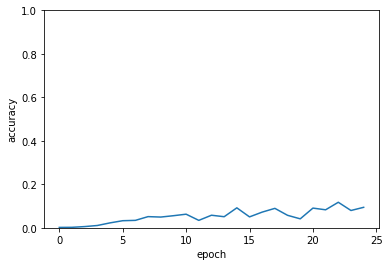

In [12]:
import matplotlib.pyplot as plt

x=np.arange(len(acc_list))
y=acc_list
plt.plot(x,y)
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

##seq2seqの改良

###入力データの反転

In [ ]:
import sys
sys.path.append('..')
import numpy as np
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.time_layers import *
from common.util import eval_seq2seq

#データの読み込み
(x_train,t_train),(x_test,t_test)=sequence.load_data('addition.txt')
x_train,x_test=x_train[:,::-1],x_test[:,::-1]   #入力データの反転

char_to_id,id_to_char=sequence.get_vocab()

#ハイパーパラメータの設定
vocab_size=len(char_to_id)
wordvec_size=16
hidden_size=128
batch_size=128
max_epoch=25
max_grad=5.0

#モデル、オプティマイザ、トレーナーの生成
model=Seq2seq(vocab_size,wordvec_size,hidden_size)
optimizer=Adam()
trainer=Trainer(model,optimizer)

acc_list=[] #1epochごとの正解率を格納するリスト
for epoch in range(max_epoch):
    trainer.fit(x_train,t_train,max_epoch=1,batch_size=batch_size,max_grad=max_grad)    #1epochごとにseq2seqの評価をするため、trainerのmax_epochは1とする

    correct_num=0
    for i in range(len(x_test)):
        question,correct=x_test[[i]],t_test[[i]]
        verbose=i<10
        correct_num+=eval_seq2seq(model,question,correct,id_to_char,verbose)
    acc=float(correct_num)/len(x_test)
    acc_list.append(acc)
    print('val acc %.3f%%'%(acc*100))

| epoch 1 |  iter 1 / 351 | time 0[s] | loss 2.56
| epoch 1 |  iter 21 / 351 | time 1[s] | loss 2.52
| epoch 1 |  iter 41 / 351 | time 2[s] | loss 2.17
| epoch 1 |  iter 61 / 351 | time 3[s] | loss 1.96
| epoch 1 |  iter 81 / 351 | time 4[s] | loss 1.91
| epoch 1 |  iter 101 / 351 | time 6[s] | loss 1.87
| epoch 1 |  iter 121 / 351 | time 7[s] | loss 1.86
| epoch 1 |  iter 141 / 351 | time 8[s] | loss 1.84
| epoch 1 |  iter 161 / 351 | time 9[s] | loss 1.80
| epoch 1 |  iter 181 / 351 | time 10[s] | loss 1.78
| epoch 1 |  iter 201 / 351 | time 12[s] | loss 1.77
| epoch 1 |  iter 221 / 351 | time 13[s] | loss 1.77
| epoch 1 |  iter 241 / 351 | time 14[s] | loss 1.76
| epoch 1 |  iter 261 / 351 | time 15[s] | loss 1.75
| epoch 1 |  iter 281 / 351 | time 17[s] | loss 1.74
| epoch 1 |  iter 301 / 351 | time 18[s] | loss 1.74
| epoch 1 |  iter 321 / 351 | time 19[s] | loss 1.74
| epoch 1 |  iter 341 / 351 | time 20[s] | loss 1.73
Q   58+77
T 162 
☒ 100 
---
Q 461+579
T 1139
☒ 1000
---
Q  48

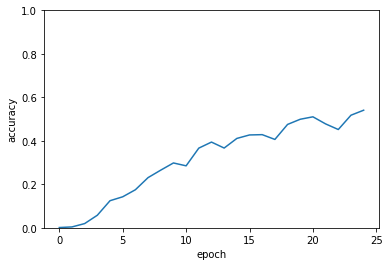

In [ ]:
import matplotlib.pyplot as plt

x=np.arange(len(acc_list))
y=acc_list
plt.plot(x,y)
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

###覗き見(Peeky)
* Encoderは入力を固定長のベクトルhに変換する
* hにはDecoderが必要な情報がすべて詰まっている
* hをDecoderの最初のLSTMレイヤだけなく、全ての時刻のLSTMレイヤとAffineレイヤに共有することで、より正しい判断ができるようになる
* ここで、LSTMレイヤとAffineレイヤには2本のベクトルが入力されることになるため、実際には2本のベクトルを結合（concatenate）して入力する

In [ ]:
class PeekyDecoder:
    def __init__(self,vocab_size,wordvec_size,hidden_size):
        V,D,H=vocab_size,wordvec_size,hidden_size
        rn=np.random.randn

        #重みの初期化
        embed_W=(rn(V,D)/100).astype('f')
        #LSTMレイヤへの入力はEmbeddingレイヤの出力(N,T,D)と、Encoderの出力(N,H)を時系列分複製した(N,T,H)を結合した(N,T,H+D)
        lstm_Wx=(rn(H+D,4*H)/np.sqrt(H+D)).astype('f')
        lstm_Wh=(rn(H,4*H)/np.sqrt(H)).astype('f')
        lstm_b=np.zeros(4*H).astype('f')
        #Affineレイヤへの入力はLSTMレイヤの出力(N,T,H)と、Encoderの出力(N,H)を時系列分複製した(N,T,H)を結合した(N,T,H+H)
        affine_W=(rn(H+H,V)/np.sqrt(H+H)).astype('f')
        affine_b=np.zeros(V).astype('f')

        #レイヤの生成
        self.embed=TimeEmbedding(embed_W)
        self.lstm=TimeLSTM(lstm_Wx,lstm_Wh,lstm_b,stateful=True)
        self.affine=TimeAffine(affine_W,affine_b)

        #パラメータの格納
        self.params,self.grads=[],[]
        for layer in (self.embed,self.lstm,self.affine):
            self.params+=layer.params
            self.grads+=layer.grads

    def forward(self,xs,h):
        N,T=xs.shape
        N,H=h.shape

        self.lstm.set_state(h)  #Encoderの出力hをDecoderの最初のLSTMレイヤにセット
        out=self.embed.forward(xs)  #Embeddingレイヤの出力
        hs=np.repeat(h,T,axis=0).reshape(N,T,H) #Encoderの出力hを時系列T分複製し整形
        out=np.concatenate((hs,out),axis=2) #Embeddingレイヤの出力とEncoderの出力（整形済み）を結合
        out=self.lstm.forward(out)  #LSTMレイヤの出力
        out=np.concatenate((hs,out),axis=2) #LSTMレイヤの出力とEncoderの出力（整形済み)を結合
        score=self.affine.forward(out)  #Affineレイヤの出力
        self.cache=H
        return score

    def backward(self,dscore):
        H=self.cache
        dout=self.affine.backward(dscore)
        dout,dhs0=dout[:,:,H:],dout[:,:,:H] #affineレイヤの入力は(hs,out)の順で結合したため、dhsはdoutのaxis=2のH番目まで
        dout=self.lstm.backward(dout)
        dout,dhs1=dout[:,:,H:],dout[:,:,:H]
        self.embed.backward(dout)
        dhs=dhs0+dhs1   #LSTMレイヤからの逆伝搬とAffineレイヤからの逆伝搬を合計
        dh=self.lstm.dh+np.sum(dhs,axis=1)  #Decoderの最初のLSTMレイヤにstateとして入力されたhの逆伝搬と、dhs(N,T,H)を時系列方向(axis=1)に集約した逆伝搬を合計
        return dh

    def generate(self, h, start_id, sample_size):
        sampled = []
        char_id = start_id
        self.lstm.set_state(h)

        H = h.shape[1]
        peeky_h = h.reshape(1, 1, H)    #Embeddingレイヤの出力(N,T,D)と形状を揃える
        for _ in range(sample_size):
            x = np.array([char_id]).reshape((1, 1))
            out = self.embed.forward(x)

            out = np.concatenate((peeky_h, out), axis=2)
            out = self.lstm.forward(out)
            out = np.concatenate((peeky_h, out), axis=2)
            score = self.affine.forward(out)

            char_id = np.argmax(score.flatten())
            sampled.append(char_id)

        return sampled

In [ ]:
class PeekySeq2seq(Seq2seq):
    def __init__(self,vocab_size,wordvec_size,hidden_size):
        V,D,H=vocab_size,wordvec_size,hidden_size

        self.encoder=Encoder(V,D,H)
        self.decoder=PeekyDecoder(V,D,H)
        self.softmax=TimeSoftmaxWithLoss()

        self.params=self.encoder.params+self.decoder.params
        self.grads=self.encoder.grads+self.decoder.grads

In [ ]:
import sys
sys.path.append('..')
import numpy as np
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.time_layers import *
from common.util import eval_seq2seq

#データの読み込み
(x_train,t_train),(x_test,t_test)=sequence.load_data('addition.txt')
x_train,x_test=x_train[:,::-1],x_test[:,::-1]   #入力データの反転

char_to_id,id_to_char=sequence.get_vocab()

#ハイパーパラメータの設定
vocab_size=len(char_to_id)
wordvec_size=16
hidden_size=128
batch_size=128
max_epoch=25
max_grad=5.0

#モデル、オプティマイザ、トレーナーの生成
model=PeekySeq2seq(vocab_size,wordvec_size,hidden_size)
optimizer=Adam()
trainer=Trainer(model,optimizer)

acc_list=[] #1epochごとの正解率を格納するリスト
for epoch in range(max_epoch):
    trainer.fit(x_train,t_train,max_epoch=1,batch_size=batch_size,max_grad=max_grad)    #1epochごとにseq2seqの評価をするため、trainerのmax_epochは1とする

    correct_num=0
    for i in range(len(x_test)):
        question,correct=x_test[[i]],t_test[[i]]
        verbose=i<10
        correct_num+=eval_seq2seq(model,question,correct,id_to_char,verbose)
    acc=float(correct_num)/len(x_test)
    acc_list.append(acc)
    print('val acc %.3f%%'%(acc*100))

| epoch 1 |  iter 1 / 351 | time 0[s] | loss 2.57
| epoch 1 |  iter 21 / 351 | time 1[s] | loss 2.48
| epoch 1 |  iter 41 / 351 | time 2[s] | loss 2.20
| epoch 1 |  iter 61 / 351 | time 3[s] | loss 1.99
| epoch 1 |  iter 81 / 351 | time 5[s] | loss 1.89
| epoch 1 |  iter 101 / 351 | time 6[s] | loss 1.82
| epoch 1 |  iter 121 / 351 | time 7[s] | loss 1.82
| epoch 1 |  iter 141 / 351 | time 9[s] | loss 1.80
| epoch 1 |  iter 161 / 351 | time 10[s] | loss 1.79
| epoch 1 |  iter 181 / 351 | time 11[s] | loss 1.78
| epoch 1 |  iter 201 / 351 | time 12[s] | loss 1.77
| epoch 1 |  iter 221 / 351 | time 14[s] | loss 1.76
| epoch 1 |  iter 241 / 351 | time 15[s] | loss 1.76
| epoch 1 |  iter 261 / 351 | time 16[s] | loss 1.75
| epoch 1 |  iter 281 / 351 | time 18[s] | loss 1.74
| epoch 1 |  iter 301 / 351 | time 19[s] | loss 1.74
| epoch 1 |  iter 321 / 351 | time 20[s] | loss 1.73
| epoch 1 |  iter 341 / 351 | time 22[s] | loss 1.73
Q   58+77
T 162 
☒ 100 
---
Q 461+579
T 1139
☒ 1013
---
Q  4

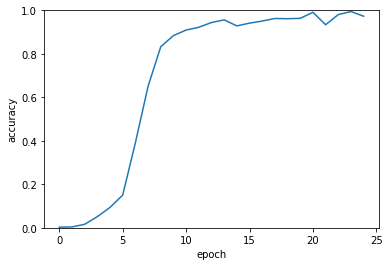

In [ ]:
import matplotlib.pyplot as plt

x=np.arange(len(acc_list))
y=acc_list
plt.plot(x,y)
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()